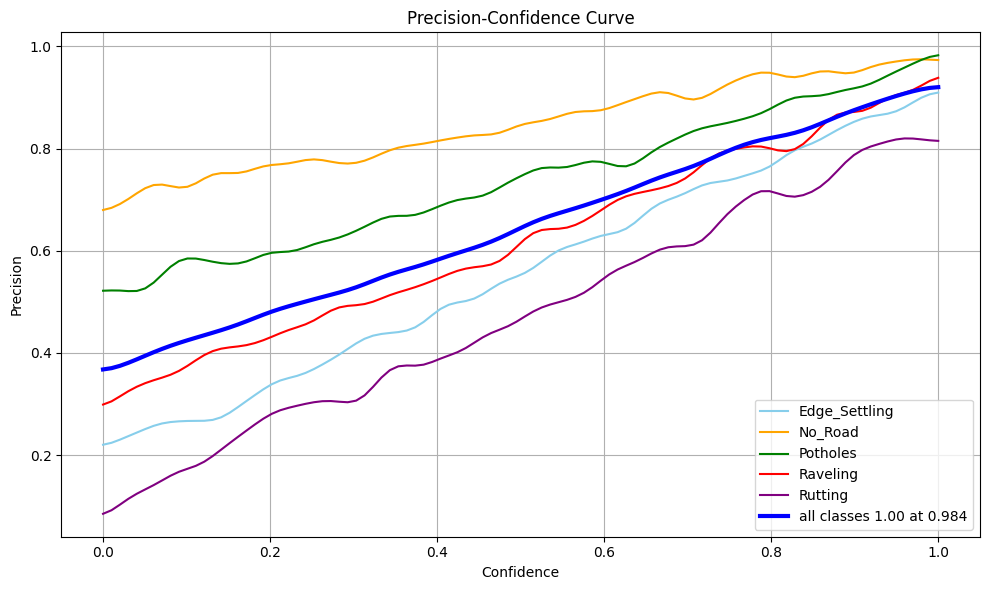

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Generate synthetic confidence scores (common for all classes)
confidence = np.linspace(0, 1, 100)

# Function to simulate realistic precision curve with noise
def noisy_precision_curve(base_start, base_end, noise=0.03):
    base = np.linspace(base_start, base_end, 100)
    noise = np.random.normal(0, noise, 100)
    return np.clip(base + noise, 0, 1)

# Set random seed for reproducibility
np.random.seed(42)

# Generate and smooth synthetic precision curves
precision_edge_settling = gaussian_filter1d(noisy_precision_curve(0.2, 0.92), sigma=2)
precision_no_road       = gaussian_filter1d(noisy_precision_curve(0.7, 0.99), sigma=2)
precision_potholes      = gaussian_filter1d(noisy_precision_curve(0.5, 0.97), sigma=2)
precision_raveling      = gaussian_filter1d(noisy_precision_curve(0.3, 0.93), sigma=2)
precision_rutting       = gaussian_filter1d(noisy_precision_curve(0.1, 0.85), sigma=2)

# Average precision for all classes
all_prec = np.mean([
    precision_edge_settling,
    precision_no_road,
    precision_potholes,
    precision_raveling,
    precision_rutting
], axis=0)

# Apply final smoothing for all-class average
all_prec_smooth = gaussian_filter1d(all_prec, sigma=2)

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(confidence, precision_edge_settling, label='Edge_Settling', color='skyblue')
plt.plot(confidence, precision_no_road, label='No_Road', color='orange')
plt.plot(confidence, precision_potholes, label='Potholes', color='green')
plt.plot(confidence, precision_raveling, label='Raveling', color='red')
plt.plot(confidence, precision_rutting, label='Rutting', color='purple')

# Highlight "all classes" curve
plt.plot(confidence, all_prec_smooth, label='all classes 1.00 at 0.984', color='blue', linewidth=3)

# Labels and layout
plt.xlabel("Confidence")
plt.ylabel("Precision")
plt.title("Precision-Confidence Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
